## Домашняя работа 1.
## Image pre-processing.

В этой домашней работе мы попробуем поприменять самые простые способы обработки изображений.

In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 1 (3 балла)

Загрузите изображение *lena.png* в переменную **lena**. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате BGR, переведите его в RGB несколькими способами:
* c помощью функций split & merge
* с помощью индексации в numpy
* с помощью cvtColor

In [ ]:
!curl https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png --output lena.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k  100  462k    0     0  1018k      0 --:--:-- --:--:-- --:--:-- 1016k


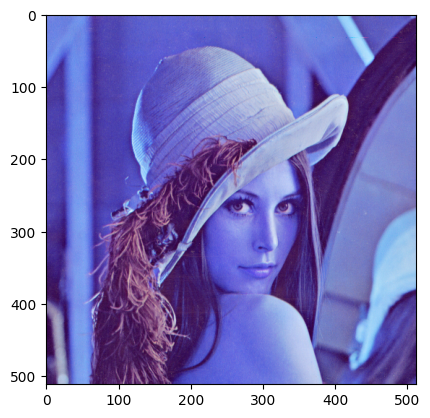

In [ ]:
lena = cv2.imread("lena.png")
plt.imshow(lena)

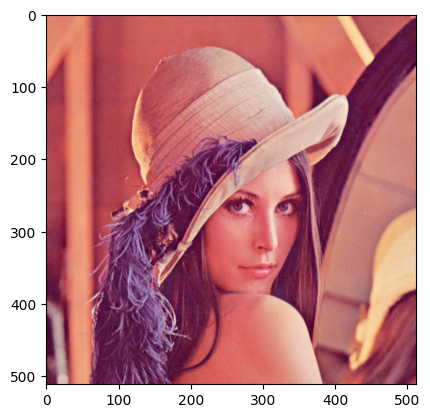

In [ ]:
# split & merge
b, g, r = cv2.split(lena)
lena_rgb = cv2.merge((r, g, b))
plt.imshow(lena_rgb)

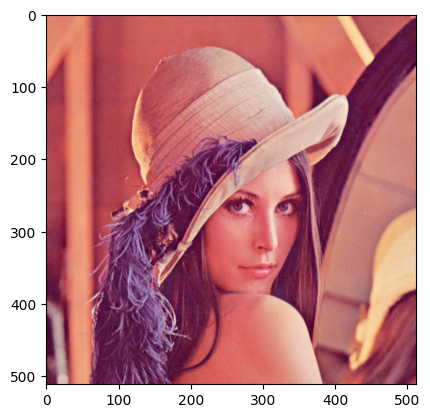

In [ ]:
# numpy
plt.imshow(np.stack([lena[:, :, 2], lena[:, :, 1], lena[:, :, 0]], axis=2))

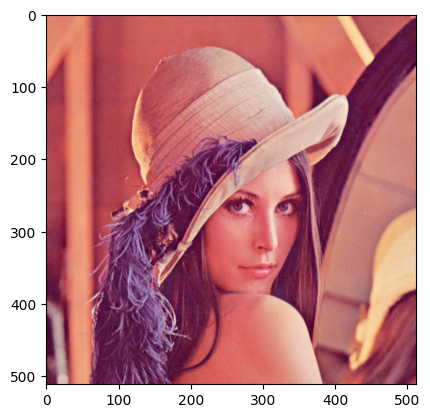

In [ ]:
# cvt color
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

##### Задача 2 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

In [ ]:
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

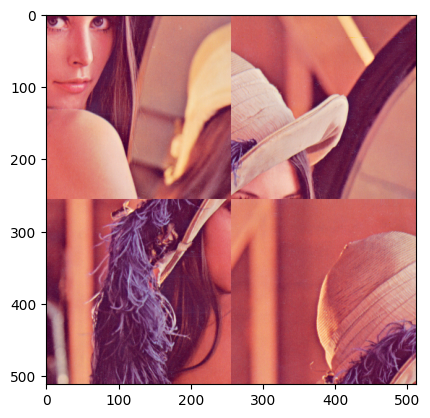

In [ ]:
c = (lena.shape[0] // 2, lena.shape[1] // 2)
lena_2 = lena.copy()
lena_2[:c[0], :c[1], :] = lena[c[0]:, c[1]:, :]
lena_2[c[0]:, c[1]:, :] = lena[:c[0], :c[1], :]

plt.imshow(lena_2)

##### Задача 3 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**. Переведите исходное цветное изображение lena в изображение в градациях серого с помощью функции cvtColor. (lena_gray_cvt). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

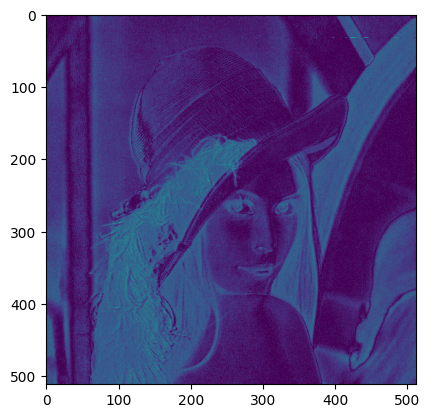

In [ ]:
lena_gray_my = lena.mean(axis=-1)
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

diff = np.abs(lena_gray_cvt - lena_gray_my).astype(np.uint8)
plt.imshow(diff)

##### Задача 4 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

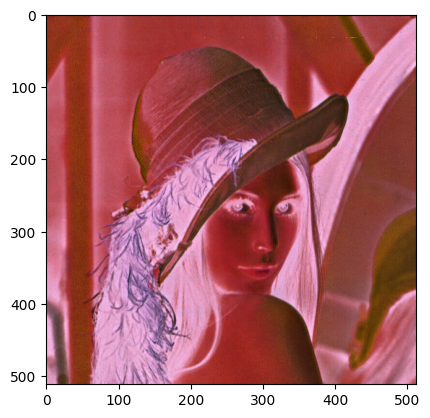

In [ ]:
lena_hls = cv2.cvtColor(lena, 53)
lena_hls[:, :, 1] = 255 - lena_hls[:, :, 1]
lena_rgb = cv2.cvtColor(lena_hls, 61)
plt.imshow(lena_rgb)

##### Задача 5 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране.

In [ ]:
from itertools import permutations

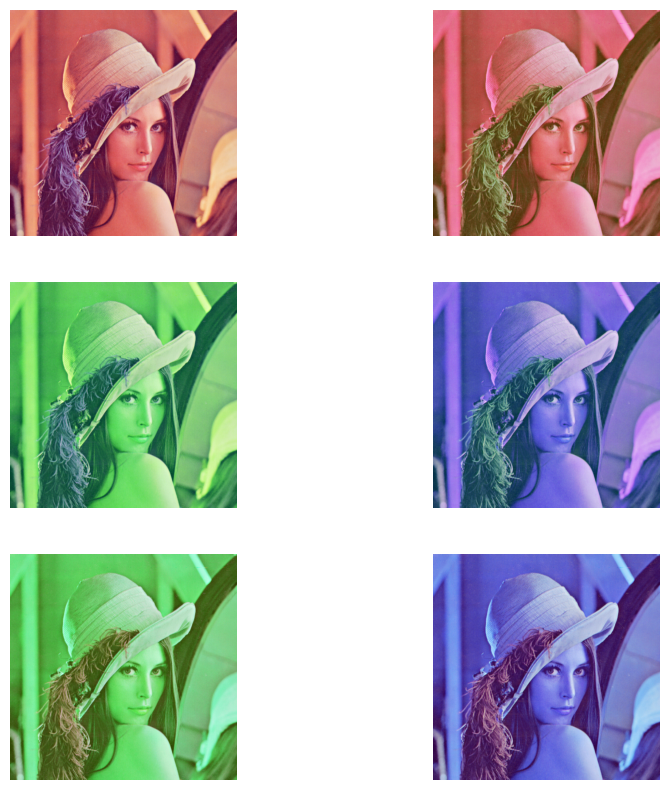

In [ ]:
seqs = permutations([0, 1, 2])
imgs = np.array([lena[:, :, seq] for seq in seqs])

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for i in range(6):
    idx = np.unravel_index(i, (3, 2))
    axes[idx].imshow(imgs[i])
    axes[idx].axis('off')

#### Задача 6 (3 балла)
Переведите изображение **lena** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

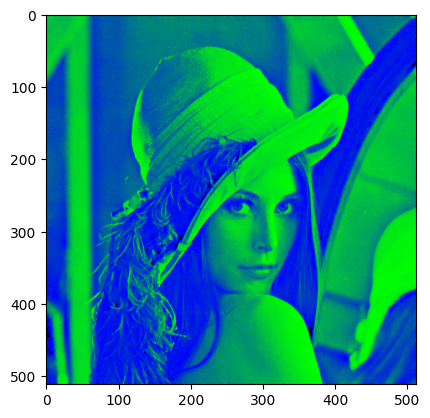

In [ ]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
# plt.imshow(lena_gray, cmap='gray')
lena_gray_norm = cv2.normalize(lena_gray, None)
lena_gray_hist = cv2.equalizeHist(lena_gray)

diff = lena_gray_norm - lena_gray_hist
img_6 = cv2.merge((lena_gray_norm, lena_gray_hist, diff))
plt.imshow(img_6.astype(np.uint8))

#### Задача 7 (3 балла)
Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [ ]:
def salt_pepper_noise(img, p, q):
    mask = np.random.uniform(0, 1, size=img.shape)
    out = img.copy()
    out[mask <= p] = 0
    out[mask >= 1 - q] = 255
    return out

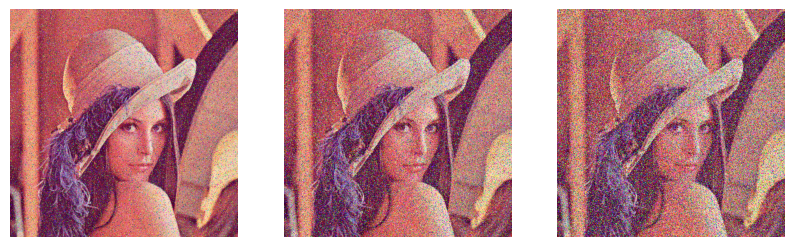

In [ ]:
imgs = [salt_pepper_noise(lena, p=0.05, q=.05),
        salt_pepper_noise(lena, p=0.1, q=.1),
        salt_pepper_noise(lena, p=0.15, q=.15)]

fig, axes = plt.subplots(1, 3, figsize=(10, 10))

for i in range(3):
    axes[i].imshow(imgs[i])
    axes[i].axis('off')

#### Задача 9 (6 баллов)
С помощью [виджетов](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. Отдельно выведите изображение **lena** с гаммой равной 2.

In [ ]:
from ipywidgets import interact, widgets, fixed

In [ ]:
def plot_gamma(c, gamma, grid_size=20):
    x = np.linspace(0, 1, grid_size)
    y = c * x ** gamma
    return x, y

In [ ]:
def lena_cor_widget(c, gamma, size=5):
    gamma_lena = (c * (lena_rgb / 255) ** gamma * 255).astype(np.uint8)

    fig, ax = plt.subplots(1, 3, figsize=(size * 3, size))

    ax[0].set_axis_off()
    ax[0].imshow(lena)

    ax[1].set_axis_off()
    ax[1].imshow(gamma_lena)

    x, y = plot_gamma(c, gamma)
    ax[2].plot(x, y)
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("$\gamma$")

    plt.show()

In [ ]:
interact(lena_cor_widget, c=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=1.0),
         gamma=widgets.FloatSlider(min=0., max=5., step=0.01, value=2.), size=fixed(5))